<a href="https://colab.research.google.com/github/nanopiero/fusion/blob/main/notebooks/fcns/training_B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resuls


In [ ]:
# ! git clone https://github.com/nanopiero/fusion.git

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import os
import time
import sys
sys.path.append('/home/mdso/lepetitp/ppc/WEBCAMS/src/raincell/ia/notebooks/learning/simulation')

from fusion.utils.datasets import spatialized_gt, create_cmls_filter, FusionDataset
from fusion.utils.datasets import indices_to_sampled_values, get_point_measurements, point_gt, segment_gt, make_noisy_images
from torch.utils.data import DataLoader
# from fusion.utils.fcn import UNet
from fusion.utils.cost_functions import QPELoss_fcn, compute_metrics
from fusion.utils.viz import set_tensor_values2, plot_images, plot_images_10pts_20seg, plot_results_10pts_20seg, moving_average

In [6]:
# Apprentissages (sauf A3)
device = torch.device('cpu')
path_B11 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B11_xrlg1_yg1.pt'
checkpoint_B11 = torch.load(path_B11, \
                            map_location=device)

losses_B11 = checkpoint_B11['train_losses']
del checkpoint_B11

path_B12 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B12_xrlg1_yg1.pt'
checkpoint_B12 = torch.load(path_B12, \
                            map_location=device)
losses_B12 = checkpoint_B12['train_losses']

del checkpoint_B12

path_B15 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B15_xrlg1_yg1.pt'
checkpoint_B15 = torch.load(path_B15, \
                            map_location=device)
losses_B15 = checkpoint_B15['train_losses']
del checkpoint_B15

path_A1 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_A1_xrl_yg1.pt'
checkpoint = torch.load(path_A1, \
                            map_location=device)
losses_A1 = checkpoint['train_losses']
del checkpoint

path_A2 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_A2_xrl_yg1g60.pt'
checkpoint = torch.load(path_A2, \
                            map_location=device)
losses_A2 = checkpoint['train_losses']
del checkpoint

path_A3 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_A3_xrl_yg1g60i.pt'
checkpoint = torch.load(path_A3, \
                            map_location=device)
losses_A3 = checkpoint['train_losses']
del checkpoint


path_B21 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B21_xrl_yg1l.pt'
checkpoint = torch.load(path_B21, \
                            map_location=device)
losses_B21 = checkpoint['train_losses']
del checkpoint

path_B3 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B3_xrg1_yg1.pt'
checkpoint = torch.load(path_B3, \
                            map_location=device)
losses_B3 = checkpoint['train_losses']
del checkpoint

path_B3 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B3_xrg1_yg1.pt'
checkpoint = torch.load(path_B3, \
                            map_location=device)
losses_B3 = checkpoint['train_losses']
del checkpoint

path_A4 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_A4_xrl_yg1.pt'
checkpoint = torch.load(path_A4, \
                            map_location=device)
losses_A4 = checkpoint['train_losses']
del checkpoint


path_A5 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_A5_xrl_yg1.pt'
checkpoint = torch.load(path_A5, \
                            map_location=device)
losses_A5 = checkpoint['train_losses']
del checkpoint

path_B16 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B16_xrlg1_yg1.pt'
checkpoint = torch.load(path_B16, \
                            map_location=device)
losses_B16 = checkpoint['train_losses']
del checkpoint

path_A1bis = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_A1bis_xrl_yg1.pt'
checkpoint = torch.load(path_A1bis, \
                            map_location=device)
losses_A1bis = checkpoint['train_losses']
del checkpoint

In [7]:
val_steps_B1 = ['eval_opportunity_cost_spat',
             # 'eval_added_value_few_spat',
             # 'eval_added_value_half_spat',
             'eval_added_value_full_spat',
             # 'eval_added_value_full_id',
             ]
val_steps_B2 = ['eval_opportunity_cost_cml_spat',
             # 'eval_added_value_half_cml_spat',
             'eval_added_value_full_cml_spat',
             ]
steps_B1 = val_steps_B1 + ['train']
steps_to_plot_B1 = [
             # 'eval_opportunity_cost_spat', 
              'eval_added_value_full_spat']
steps_to_plot_B2 = [
             # 'eval_opportunity_cost_cml_spat',
             # 'eval_added_value_half_cml_spat',
             'eval_added_value_full_cml_spat',
             ]
steps_to_plot_B3 = [
             # 'eval_opportunity_cost_spat',
             'eval_added_value_full_spat',
             ]
steps_to_plot_A4 = [
             'train',
             'val',
             ]

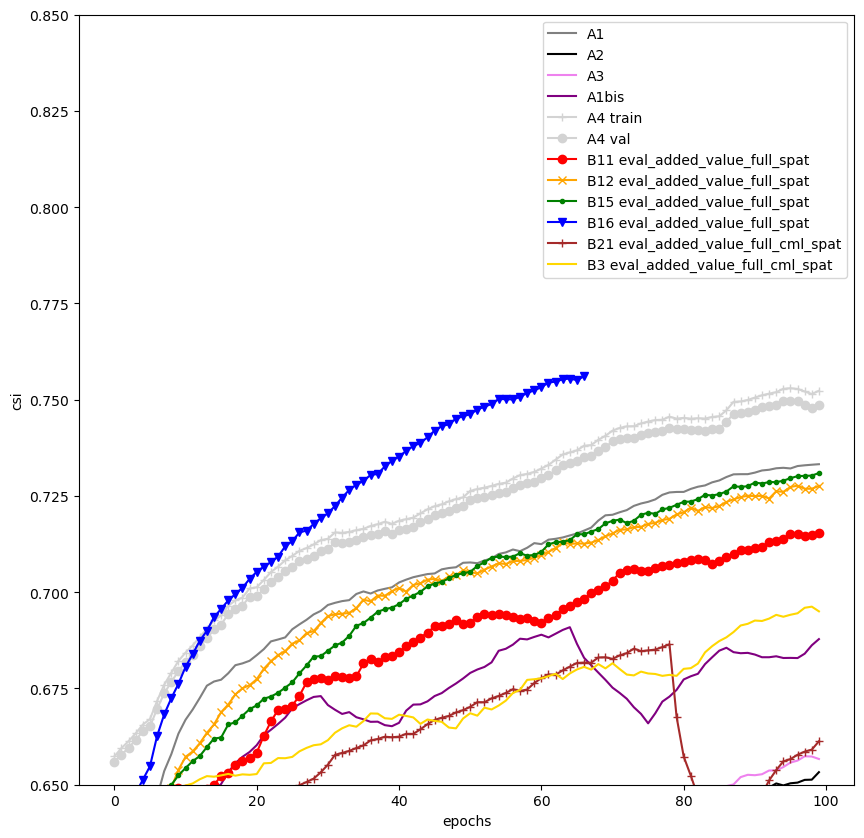

In [8]:
colors = ['red', 'orange', 'green', 'blue', 'violet', 'palegreen']
i = 4
j = 1
start = 0
end = 100
plt.figure(figsize=(10,10))
csi_values_A1 = [compute_metrics(x[i])[j] for x in losses_A1]
csi_values_A2 = [compute_metrics(x[i])[j] for x in losses_A2]
csi_values_A3 = [compute_metrics(x[i])[j] for x in losses_A3]
csi_values_A1bis = [compute_metrics(x[i])[j] for x in losses_A1bis]
plt.plot(moving_average(csi_values_A1, 10)[start:end], color = 'grey')
plt.plot(moving_average(csi_values_A2, 10)[start:end], color = 'black') 
plt.plot(moving_average(csi_values_A3, 10)[start:end], color = 'violet')
plt.plot(moving_average(csi_values_A1bis, 10)[start:end], color = 'purple')

csi_values_A4 = [compute_metrics(x[i])[j] for x in losses_A4['train']]
plt.plot(moving_average(csi_values_A4, 10)[start:end], color = 'lightgrey', marker = '+')
csi_values_A4 = [compute_metrics(x[i])[j] for x in losses_A4['val']]
plt.plot(moving_average(csi_values_A4, 10)[start:end], color = 'lightgrey', marker = 'o')

for k in range(len(steps_to_plot_B1)):
  csi_values_B11 = [compute_metrics(x[i])[j] for x in losses_B11[steps_to_plot_B1[k]]]
  csi_values_B12 = [compute_metrics(x[i])[j] for x in losses_B12[steps_to_plot_B1[k]]]
  csi_values_B15 = [compute_metrics(x[i])[j] for x in losses_B15[steps_to_plot_B1[k]]]
  csi_values_B16 = [compute_metrics(x[i])[j] for x in losses_B16[steps_to_plot_B1[k]]]
  plt.plot(moving_average(csi_values_B11, 10)[start:end], color = colors[4*k], marker = 'o')
  plt.plot(moving_average(csi_values_B12, 10)[start:end], color = colors[4*k + 1], marker = 'x')    
  plt.plot(moving_average(csi_values_B15, 10)[start:end], color = colors[4*k + 2], marker = '.')
  plt.plot(moving_average(csi_values_B16, 10)[start:end], color = colors[4*k + 3], marker = 'v')
    
for k in range(len(steps_to_plot_B2)):
  csi_values_B21 = [compute_metrics(x[i])[j] for x in losses_B21[steps_to_plot_B2[k]]]
  csi_values_B3 = [compute_metrics(x[i])[j] for x in losses_B3[steps_to_plot_B3[k]]]
  plt.plot(moving_average(csi_values_B21, 10)[start:end], color = 'brown', marker = '+')
  plt.plot(moving_average(csi_values_B3, 10)[start:end], color = 'gold')
    
plt.ylabel('csi')
plt.xlabel('epochs')
plt.ylim(0.65,0.85)
plt.legend(['A1', 'A2', 'A3', 'A1bis'] + ['A4 train', 'A4 val'] + [e + s for s in steps_to_plot_B1 for e in ['B11 ', 'B12 ', 'B15 ', 'B16 ']] + [e + s for s in steps_to_plot_B2 for e in ['B21 ', 'B3 ']])

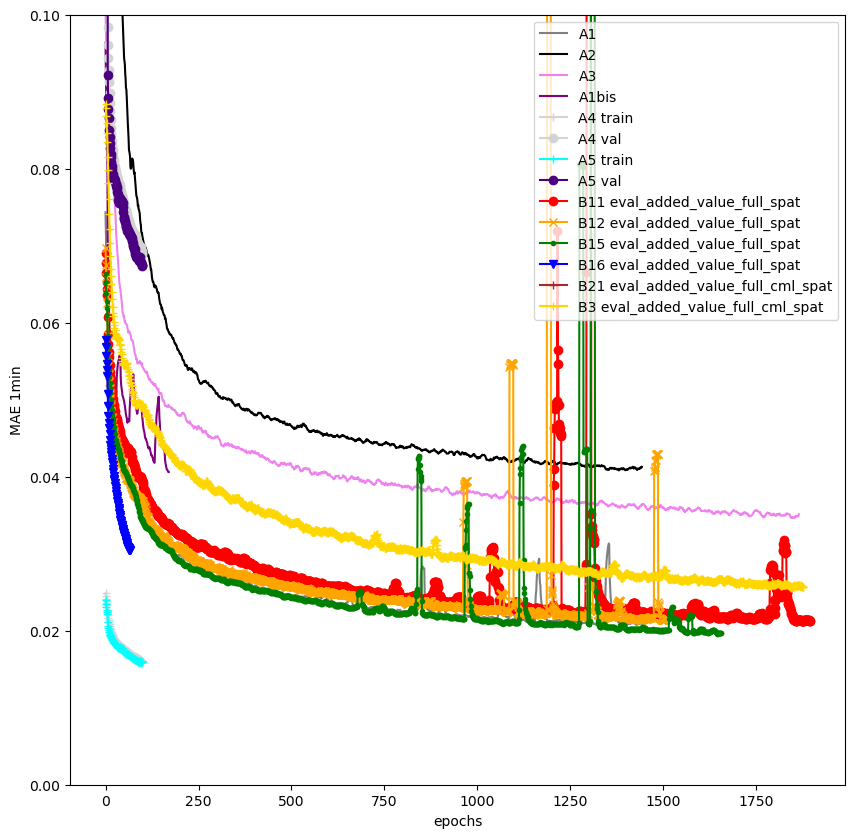

In [9]:
i = 1

plt.figure(figsize=(10,10))
mae1min_values_A1 = [x[i] for x in losses_A1]
mae1min_values_A2 = [x[i] for x in losses_A2]
mae1min_values_A3 = [x[i] for x in losses_A3]
mae1min_values_A1bis = [x[i] for x in losses_A1bis]
plt.plot(moving_average(mae1min_values_A1, 10), color = 'grey')
plt.plot(moving_average(mae1min_values_A2, 10), color = 'black') 
plt.plot(moving_average(mae1min_values_A3, 10), color = 'violet') 
plt.plot(moving_average(mae1min_values_A1bis, 10), color = 'purple') 

mae1min_values_A4 = [x[i] for x in losses_A4['train']]
plt.plot(moving_average(mae1min_values_A4, 10)[start:end], color = 'lightgrey', marker = '+')
mae1min_values_A4 = [x[i] for x in losses_A4['val']]
plt.plot(moving_average(mae1min_values_A4, 10)[start:end], color = 'lightgrey', marker = 'o')
mae1min_values_A5 = [x[i] for x in losses_A5['train']]
plt.plot(moving_average(mae1min_values_A5, 10)[start:end], color = 'cyan', marker = '+')
mae1min_values_A5 = [x[i] for x in losses_A5['val']]
plt.plot(moving_average(mae1min_values_A5, 10)[start:end], color = 'indigo', marker = 'o')

for k in range(len(steps_to_plot_B1)):
  mae1min_values_B11 = [x[i] for x in losses_B11[steps_to_plot_B1[k]]]
  mae1min_values_B12 = [x[i] for x in losses_B12[steps_to_plot_B1[k]]]
  mae1min_values_B15 = [x[i] for x in losses_B15[steps_to_plot_B1[k]]]
  mae1min_values_B16 = [x[i] for x in losses_B16[steps_to_plot_B1[k]]]
  plt.plot(moving_average(mae1min_values_B11, 10), color = colors[4*k], marker = 'o')
  plt.plot(moving_average(mae1min_values_B12, 10), color = colors[4*k + 1], marker = 'x')
  plt.plot(moving_average(mae1min_values_B15, 10), color = colors[4*k + 2], marker = '.')
  plt.plot(moving_average(mae1min_values_B16, 10), color = colors[4*k + 3], marker = 'v')
    
for k in range(len(steps_to_plot_B2)):
  mae1min_values_B21 = [x[i] for x in losses_B21[steps_to_plot_B2[k]]]
  mae1min_values_B3 = [x[i] for x in losses_B3[steps_to_plot_B3[k]]]
  plt.plot(moving_average(mae1min_values_B21, 10), color = 'brown', marker = '+')
  plt.plot(moving_average(mae1min_values_B3, 10), color = 'gold', marker = '+')


plt.ylabel('MAE 1min')
plt.xlabel('epochs')
plt.ylim(0.0,0.1)
plt.legend(['A1', 'A2', 'A3', 'A1bis']  + ['A4 train', 'A4 val', 'A5 train', 'A5 val'] + [e + s for s in steps_to_plot_B1 for e in ['B11 ', 'B12 ', 'B15 ', 'B16 ']] + [e + s for s in steps_to_plot_B2 for e in ['B21 ', 'B3 ']])

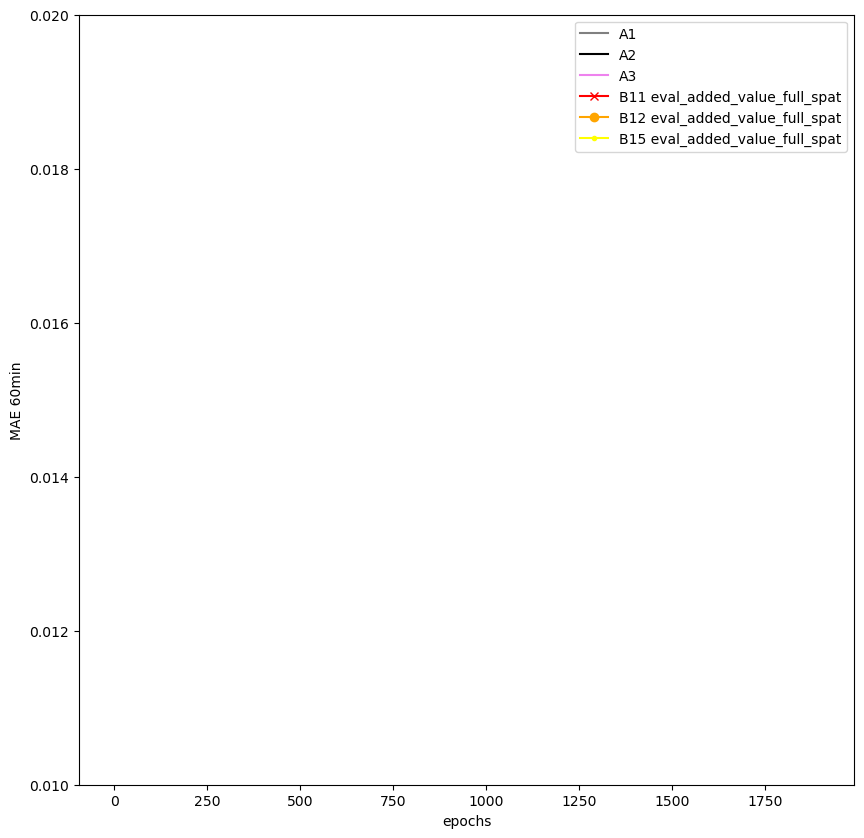

In [14]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']

i = 2

plt.figure(figsize=(10,10))
mae60min_values_A1 = [x[i] for x in losses_A1]
mae60min_values_A2 = [x[i] for x in losses_A2]
mae60min_values_A3 = [x[i] for x in losses_A3]
plt.plot(moving_average(mae60min_values_A1, 10), color = 'grey')
plt.plot(moving_average(mae60min_values_A2, 10), color = 'black') 
plt.plot(moving_average(mae60min_values_A3, 10), color = 'violet') 

for k in range(len(steps_to_plot_B1)):
  mae60min_values_B11 = [x[i] for x in losses_B11[steps_to_plot_B1[k]]]
  mae60min_values_B12 = [x[i] for x in losses_B12[steps_to_plot_B1[k]]]
  mae60min_values_B15 = [x[i] for x in losses_B11[steps_to_plot_B1[k]]]
  plt.plot(moving_average(mae60min_values_B12, 10), color = colors[3*k], marker = 'x')
  plt.plot(moving_average(mae60min_values_B11, 10), color = colors[3*k + 1], marker = 'o')
  plt.plot(moving_average(mae60min_values_B11, 10), color = colors[3*k + 2], marker = '.')


for k in range(len(steps_to_plot_B2)):
  mae60min_values_B21 = [x[i] for x in losses_B21[steps_to_plot_B2[k]]]
  mae60min_values_B3 = [x[i] for x in losses_B3[steps_to_plot_B3[k]]]
  plt.plot(moving_average(mae1min_values_B21, 10), color = 'brown', marker = '+')
  plt.plot(moving_average(mae1min_values_B3, 10), color = 'gold', marker = '+')

plt.ylabel('MAE 60min')
plt.xlabel('epochs')
plt.ylim(0.01,0.02)
plt.legend(['A1', 'A2', 'A3'] + [e + s for s in steps_to_plot_B1 for e in ['B11 ', 'B12 ', 'B15 ']])

In [ ]:
path = path_A1


use_fcn = True
nsteps = 60
npoints = 20
npairs = 20
size_image = 64
length_dataset = 6400
ndiscs = 5
dataset = FusionDataset(length_dataset=length_dataset,
                        npairs=npairs,
                        nsteps=nsteps,
                        ndiscs=ndiscs, size_image=size_image)


loader = DataLoader(dataset, batch_size=64, num_workers=4)

if '_A' in path:
    ch_in = 72 
    ch_out = nsteps * 3 
    size = nsteps * 3
if '_A3' in path:
    ch_in = 72 
    ch_out = nsteps * 3 + 1 
    size = nsteps * 3
if '_B' in path:
    ch_in = 72 + 60
    ch_out = nsteps * 3 + 1 
    size = nsteps * 3
    
model = UNet(ch_in, ch_out, size, nb_additional_parameters=16).to(device)

checkpoint = torch.load(path, \
                            map_location=device)
last_epoch = checkpoint['epoch']
losses = checkpoint['train_losses']
# best_loss = checkpoint['best_loss']
model_weights = checkpoint['model']
# scheduler_state_dict = checkpoint['scheduler']
model.load_state_dict(model_weights)
del checkpoint, model_weights

In [ ]:
# Tracé output


with torch.no_grad():

  running_regression_loss = 0.0
  running_segmentation_loss = 0.0
  train_confusion_matrix = np.zeros((2, 2), dtype=int)

  for i, (images, pairs, filters) in enumerate(loader):
      break

# ground truth (not usable)
images = images.clone().detach().float().to(device)

# pseudo CMLs
pairs = pairs.clone().detach().float().to(device)
filters = filters.clone().float().detach().to(device)

# generation point and segment measurements
# segment_measurements = segment_gt(images, pairs, filters)
segment_measurements, segment_measurements_fcn = segment_gt(images, pairs, filters, use_fcn=use_fcn)

# pseudo pluvios
point_measurements, point_measurements_fcn, (indices, rows, cols) = \
                    point_gt(images, npoints=npoints, use_fcn=use_fcn)

# split

np_inputs = npoints // 2
np_targets = npoints // 2
split = [np_inputs, np_targets]
split_inputs, split_targets = point_gt(images, npoints=npoints,
                                       use_fcn=use_fcn,
                                       split=split)


_, point_measurements_fcn_inputs, _ = split_inputs
point_measurements, point_measurements_fcn_targets, (split_indices, rows, cols) = split_targets

# pseudo radar
noisy_images = make_noisy_images(images)

In [ ]:
# prepare inputs and targets
if ch_in == 72:
    inputs = torch.cat([noisy_images, segment_measurements_fcn], dim=1)
elif ch_in > 72: 
    inputs = torch.cat([noisy_images, segment_measurements_fcn, point_measurements_fcn_inputs], dim=1)
targets = point_measurements_fcn_targets

outputs = model(inputs)
mask_rnr = outputs[:, :nsteps,...] < outputs[:, nsteps:2*nsteps,...]
images_pred = (mask_rnr * outputs[:, 2*nsteps:3*nsteps, ...]).detach()

# segment_measurements = segment_gt(images, pairs, filters)
segment_measurements_pred, _ = segment_gt(images_pred,
                                          pairs,
                                          filters,
                                          use_fcn=use_fcn)

# pseudo pluvios
sampled_values_pred = indices_to_sampled_values(images_pred, split_indices)
point_measurements_pred = get_point_measurements(rows, cols,
                                                 sampled_values_pred,
                                                 size_image)

In [ ]:
k=3
"""
plot_images_10pts_20seg(3*images_pred[k,...].cpu().numpy() + filters[k,...].cpu().numpy().sum(axis=0),
            noisy_images[k,...].cpu().numpy(),
            point_measurements[k,...].cpu().numpy(),
            segment_measurements[k,...].cpu().numpy())
"""
images_to_plot = 3*images[k,...].cpu().numpy() 
images_to_plot[filters[k,...].sum(axis=0).view(1,64,64).expand(60,64,64).cpu().numpy() > 0] = 1
images_to_plot[point_measurements_fcn_inputs[k,...].cpu().numpy() >= 0] = 1

images_pred_to_plot = 3*images_pred[k,...].cpu().numpy() 
images_pred_to_plot[filters[k,...].sum(axis=0).view(1,64,64).expand(60,64,64).cpu().numpy() > 0] = 1
images_pred_to_plot[point_measurements_fcn_inputs[k,...].cpu().numpy() >= 0] = 1

plot_results_10pts_20seg(images_to_plot,
                         noisy_images[k,...].cpu().numpy(),
                         point_measurements[k,...].cpu().numpy(),
                         segment_measurements[k,...].cpu().numpy(),
                         images_pred_to_plot,
                         (images_pred[k, torch.arange(4, 60, 5), ...] > 0).long().cpu().numpy(),
                         point_measurements_pred[k,...].cpu().numpy(), #_pred)
                         segment_measurements_pred[k,...].cpu().numpy()) #_pred)

In [ ]:
k=2
"""
plot_images_10pts_20seg(3*images_pred[k,...].cpu().numpy() + filters[k,...].cpu().numpy().sum(axis=0),
            noisy_images[k,...].cpu().numpy(),
            point_measurements[k,...].cpu().numpy(),
            segment_measurements[k,...].cpu().numpy())
"""
images_to_plot = 3*images[k,...].cpu().numpy() 
images_to_plot[filters[k,...].sum(axis=0).view(1,64,64).expand(60,64,64).cpu().numpy() > 0] = 1
images_to_plot[point_measurements_fcn_inputs[k,...].cpu().numpy() >= 0] = 1

images_pred_to_plot = 3*images_pred[k,...].cpu().numpy() 
images_pred_to_plot[filters[k,...].sum(axis=0).view(1,64,64).expand(60,64,64).cpu().numpy() > 0] = 1
images_pred_to_plot[point_measurements_fcn_inputs[k,...].cpu().numpy() >= 0] = 1

plot_results_10pts_20seg(images_to_plot,
                         noisy_images[k,...].cpu().numpy(),
                         point_measurements[k,...].cpu().numpy(),
                         segment_measurements[k,...].cpu().numpy(),
                         images_pred_to_plot,
                         (images_pred[k, torch.arange(4, 60, 5), ...] > 0).long().cpu().numpy(),
                         point_measurements_pred[k,...].cpu().numpy(), #_pred)
                         segment_measurements_pred[k,...].cpu().numpy()) #_pred)

In [ ]:
filters[k,...].shape

In [ ]:
# Premiers apprentissages
# device = torch.device('cpu')
# path_B11 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_B11_xrlg1_yg1g60.pt'
# checkpoint_B11 = torch.load(path_B11, \
#                             map_location=device)

# losses_B11_old = checkpoint_B11['train_losses']

# del checkpoint_B11

# path_B12 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_B12_xrlg1_yg1g60.pt'
# checkpoint_B12 = torch.load(path_B12, \
#                             map_location=device)
# losses_B12_old = checkpoint_B12['train_losses']

# del checkpoint_B12

# path_B15 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_B15_xrlg1_yg1g60.pt'
# checkpoint_B15 = torch.load(path_B15, \
#                             map_location=device)
# losses_B15_old = checkpoint_B15['train_losses']
# del checkpoint_B15

# path_A1 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_A1_xrl_yg1.pt'
# checkpoint = torch.load(path_A1, \
#                             map_location=device)
# losses_A1_old = checkpoint['train_losses']
# del checkpoint

# path_A2 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_A2_xrl_yg1g60.pt'
# checkpoint = torch.load(path_A2, \
#                             map_location=device)
# losses_A2_old = checkpoint['train_losses']
# del checkpoint

# path_A3 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_A3_xrl_yg1g60i.pt'
# checkpoint = torch.load(path_A3, \
#                             map_location=device)
# losses_A3_old = checkpoint['train_losses']
# del checkpoint


# path_B2 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_B2_xrlg1_yg1g60l.pt'
# checkpoint = torch.load(path_B2, \
#                             map_location=device)
# losses_B2_old = checkpoint['train_losses']
# del checkpoint


# path_B21 = r'/scratch/mdso/lepetitp/ppc/RAINCELL/models/simulation/checkpoint_fcn_exp_B21_xrl_yg1l.pt'
# checkpoint = torch.load(path_B21, \
#                             map_location=device)
# losses_B21 = checkpoint['train_losses']
# del checkpoint

In [ ]:
# CSI par pixel
# i = 4
# j = 1
# start = 0
# end = 1500
# plt.figure(figsize=(10,10))
# csi_values_A1 = [compute_metrics(x[i])[j] for x in losses_A1]
# csi_values_A1_old = [compute_metrics(x[i])[j] for x in losses_A1_old]
# csi_values_A2 = [compute_metrics(x[i])[j] for x in losses_A2]
# csi_values_A2_old = [compute_metrics(x[i])[j] for x in losses_A2_old]
# csi_values_A3 = [compute_metrics(x[i])[j] for x in losses_A3]
# plt.plot(moving_average(csi_values_A1, 10)[start:end], color = 'grey', marker='x')
# plt.plot(moving_average(csi_values_A1_old, 10)[start:end], color = 'black', marker='x') 
# plt.plot(moving_average(csi_values_A2, 10)[start:end], color = 'pink', marker='+')
# plt.plot(moving_average(csi_values_A2_old, 10)[start:end], color = 'red', marker='+')
# plt.plot(moving_average(csi_values_A3, 10)[start:end], color = 'blue', marker='+')
# plt.ylabel('csi')
# plt.xlabel('epochs')
# plt.ylim(0.6,0.90)
# plt.legend(['A1', 'A1 old', 'A2' , 'A2 old', 'A3'])

# plt.figure(figsize=(10,10))
# i = 1
# mae1min_values_A1 = [x[i] for x in losses_A1]
# mae1min_values_A1_old = [x[i] for x in losses_A1_old]
# mae1min_values_A2 = [x[i] for x in losses_A2]
# mae1min_values_A2_old = [x[i] for x in losses_A2_old]
# plt.plot(moving_average(mae1min_values_A1, 10), color = 'grey')
# plt.plot(moving_average(mae1min_values_A1_old, 10), color = 'black') 
# plt.plot(moving_average(mae1min_values_A2, 10), color = 'pink') 
# plt.plot(moving_average(mae1min_values_A2_old, 10), color = 'red') 
# plt.ylabel('MAE 1min')
# plt.xlabel('epochs')
# plt.ylim(0.01,0.09)
# plt.legend(['A1', 'A1 old', 'A2' , 'A2 old'])


# plt.figure(figsize=(10,10))
# i = 2
# mae1min_values_A1 = [x[i] for x in losses_A1]
# mae1min_values_A1_old = [x[i] for x in losses_A1_old]
# mae1min_values_A2 = [x[i] for x in losses_A2]
# mae1min_values_A2_old = [x[i] for x in losses_A2_old]
# plt.plot(moving_average(mae1min_values_A1, 10), color = 'grey')
# plt.plot(moving_average(mae1min_values_A1_old, 10), color = 'black') 
# plt.plot(moving_average(mae1min_values_A2, 10), color = 'pink') 
# plt.plot(moving_average(mae1min_values_A2_old, 10), color = 'red') 
# plt.ylabel('MAE 1min')
# plt.xlabel('epochs')
# plt.ylim(0.01,300)
# plt.legend(['A1', 'A1 old', 'A2' , 'A2 old'])

In [ ]:
# colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
# i = 4
# j = 1
# start = 0
# end = 500

# # plt.figure(figsize=(10,10))
# # i = 1
# # mae1min_values_A1 = [x[i] for x in losses_A1]
# """
# for k in range(len(steps_to_plot_B2)):
#   csi_values_B2 = [compute_metrics(x[i])[j] for x in losses_B2[steps_to_plot_B2[k]]]
#   plt.plot(moving_average(csi_values_B2, 10)[start:end], color = colors[k], marker = '+')

# plt.ylabel('csi')
# plt.xlabel('epochs')
# plt.ylim(0.4,0.80)
# plt.legend([e + s for s in steps_to_plot_B2 for e in ['B2']])
# """
# i=5
# for k in range(len(steps_to_plot_B2)):
#   mae1min_values_B2 = [x[i] for x in losses_B2[steps_to_plot_B2[k]]]  
#   plt.plot(moving_average(mae1min_values_B2, 10), color = colors[k], marker = '+')
    
# plt.ylabel('MAE 1min')
# plt.xlabel('epochs')
# plt.ylim(0.02,0.05)
# plt.legend(['A1', 'A2', 'A3'] + [e + s for s in steps_to_plot_B1 for e in ['B11 ', 'B12 ', 'B15 ']] + [e + s for s in steps_to_plot_B2 for e in ['B2 ']])